In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [40]:
x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = 3.5
c = 0.0
y = a*(x**2) + (b*x) + c

noise = np.random.normal(0,10.,100)
y = y + noise

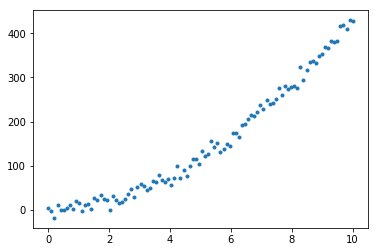

In [7]:
plt.plot(x, y, '.')

General formula of Linear Regression
<center>
    $Y = XW+e$
</center>   

 where,
- Y: true value
- $W$: the model coefficients
- $e$: some residual (or error) between the model and true values


We assume that $Y \sim N(\mu, \sigma)$ = $Y \sim N(XW, e)$. Re-written:
<br>
<center>
$\prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(y_i - W^tx_i)^2\}$
</center>
<br>
<center>
$\frac{1}{\sqrt{2\pi\sigma^2}}^n \exp\{-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - W^tx_i)^2\}$
</center>
In a nicer way our likelihood will be: <br>
<center>
$L(W|x_1,x_2,..,x_n) = (2\pi\sigma^2)^{\frac{n}{2}}exp\{-\frac{(Y-XW)^T(Y-XW)}{2\sigma^2}\}$
</center>

In [9]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(y_pred, y_true, n):
    error = y_true-y_pred
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

Optimization is used to determine which parameters $\beta$ maximize the log-likelihood function.<br>
So since our data originates from a second order polynomial, let’s fit a second order polynomial to the data. First we’ll have to define a function which will calculate the log likelihood value of the second order polynomial for three different coefficients (‘var’).

In [22]:
#   define my function which will return the objective function to be minimized
def myFunction(var):
    #   load my  data
    y_pred = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(y_pred, y, float(len(y_pred)))
    return (-1*f)

In [14]:
#  Let's pick some random starting points for the optimization    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS', options={'disp': True})

         Current function value: 376.625764
         Iterations: 18
         Function evaluations: 156
         Gradient evaluations: 31


In [27]:
res['x']

array([-0.90778852,  3.48612187,  4.0298526 ])

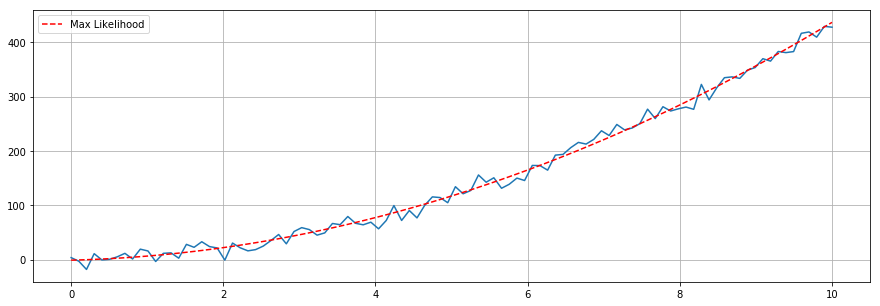

In [31]:
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.plot(x,(res['x'][2]*(x**2)) + (res['x'][1]*x) + res['x'][0], '--r', label='Max Likelihood')
plt.grid(True)
plt.legend()
plt.show()

## Using Scikit-learn

In [72]:
# We will use the linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x[:,None], y)
y_pred = reg.predict(x[:,None])

In [78]:
from sklearn.preprocessing import PolynomialFeatures # to create y = w0x w1x^2 ...
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x[:,None])

linear_2 = LinearRegression().fit(x_poly, y)
y_pred2 = linear_2.predict(x_poly)

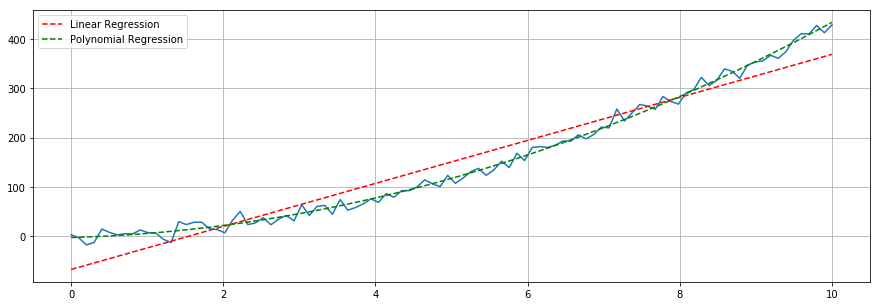

In [79]:
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.plot(x, y_pred, '--r', label='Linear Regression')
plt.plot(x, y_pred2, '--g', label='Polynomial Regression')
plt.grid(True)
plt.legend()
plt.show()